# **Indian Food Analysis**

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/indian_food.csv')

In [ ]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [ ]:
data.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [ ]:
data.isnull().any()

,0
name,False
ingredients,False
diet,False
prep_time,False
cook_time,False
flavor_profile,False
course,False
state,False
region,True


In [ ]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [ ]:
data.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,30
cook_time,28
flavor_profile,29
course,0
state,24
region,14


In [ ]:
data.shape

(255, 9)

In [ ]:
pie_data = data.diet.value_counts().reset_index()

In [ ]:
pie_data.columns = ['diet', 'count']
fig=px.pie(pie_data,values='count',names='diet',title='propotion of vegetarian and non-vegetarian dishes',color_discrete_sequence=['green','red'])
fig.show()

In [ ]:
cooking_time=data[['cook_time','name']]

In [ ]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [ ]:
cooking_time.sort_values(by='cook_time',ascending=False).head(10)

,cook_time,name
62,720.0,Shrikhand
114,120.0,Pindi chana
75,120.0,Biryani
27,120.0,Malapua
115,90.0,Rajma chaval
83,90.0,Daal baati churma
130,90.0,Idli
34,90.0,Rasgulla
128,90.0,Dosa
142,90.0,Kuzhakkattai


In [ ]:
ten_cook_quickly=cooking_time.head(10)

In [ ]:
fig=px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time', color_discrete_sequence=['green'])
fig.show()

In [ ]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [ ]:
tencooking_time_longest=cooking_time_longest.head(10)

In [ ]:
import matplotlib.pyplot as plt

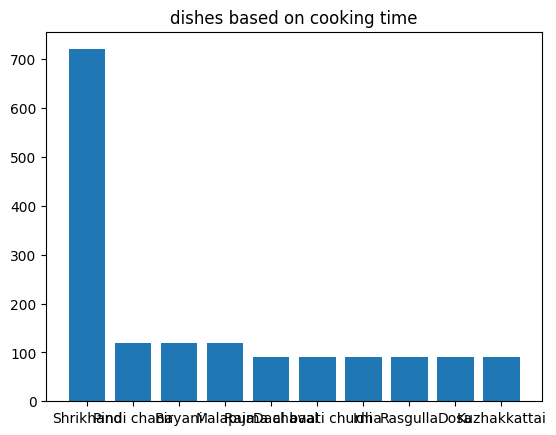

In [ ]:
y= tencooking_time_longest['cook_time']
x= tencooking_time_longest['name']
plt.bar(x,y)
plt.title('dishes based on cooking time')
plt.show()